In [1]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid23461/


In [2]:
client

Client Scheduler: tcp://127.0.0.1:32857 Dashboard: http://127.0.0.1:8811/status,Cluster Workers: 2 Cores: 2 Memory: 240.00 GB


In [8]:
nside=512
lmax_cl=nside*3-1
window_lmax=lmax_cl
use_window=True
f_sky=0.3

do_pseudo_cl=True
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=False
use_binned_theta=False

store_win=True

nz_PS=10

do_cov=False


In [9]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 153 1536 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:922: MatplotlibDepr

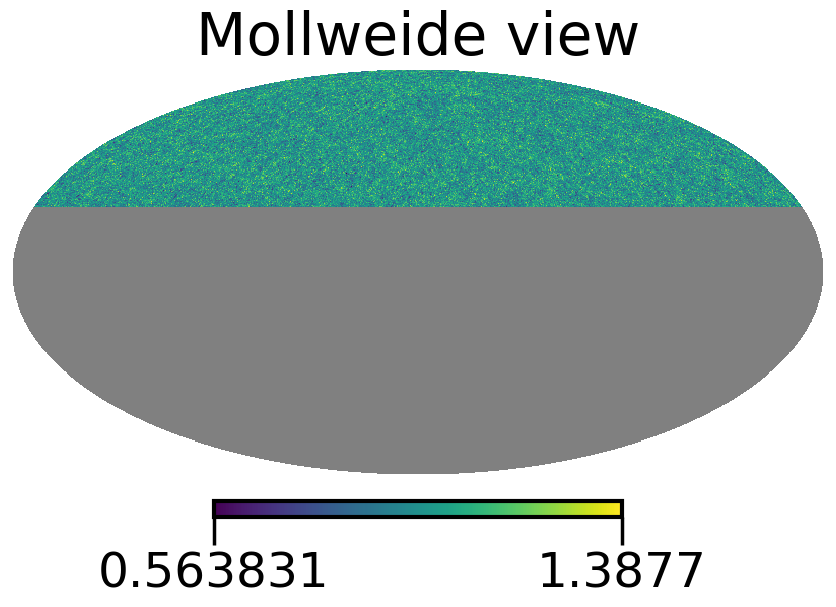

In [89]:
hp.mollview(shear_zbins[0]['window'])

In [10]:
corrs=[corr_gg]#corr_ll,corr_gg,corr_ggl]

In [11]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=(2,2)

In [12]:
#setup parameters
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+1
lmax_cl_Bins=lmax_cl-1
Nl_bins=50
# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=50)#,binning_mode='decreasing')
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [13]:
theta_min=0.01/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max=180
n_theta_bins=151
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*40)
theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)

In [14]:
#Hankel Transform setup
WT_kwargs={'l':l0,'l_cut_weights':np.ones_like(l0),'theta':th*d2r,'s1_s2':[(0,0),s],
           'wig_d_taper_order_low':None,'wig_d_taper_order_high':None} 
# if globals().get('WT') is None:
WT=wigner_transform(**WT_kwargs )
# WT_b=wigner_transform(**WT_kwargs)
WT_b=WT
WT.gather_data()

l_cut_coupling: (6040, 6040) (6040,) (6040, 6040)
l_cut_coupling: (6040, 6040) (6040,) (6040, 6040)
Scattering WT data 1


In [15]:
wigner_step=100
bin_window=False

In [16]:
Skylens_kwargs=parse_dict(locals())
Skylens_kwargs_ub=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_ub['bin_xi']=False
Skylens_kwargs_ub['use_window']=False
Skylens_kwargs_ub['bin_cl']=False
Skylens_kwargs_ub['theta_bins']=th

In [77]:
Skylens_kwargs_b=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_b['do_pseudo_cl']=False
Skylens_kwargs_b['use_binned_l']=True
Skylens_kwargs_b['use_binned_theta']=True
Skylens_kwargs_b['WT']=WT_b

In [18]:
SL_xi0=Skylens(**Skylens_kwargs)
SL_xi0_ub=Skylens(**Skylens_kwargs_ub)

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1535 1536.0 5
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.0002529621124267578
set window_cl: cl done 28.97180986404419 423.319 0.001
Win_cli ('galaxy', 'galaxy', 0, 0) ('galaxy', 'galaxy') (0, 0)
set window_cl: cl done 29.46630573272705 423.319 0.001
cl+cov bags done 1 0 29.861592531204224
set_window_cl done 31.54129409790039
Got xi win graph
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l5000_w5000_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])
setting windows, coupling matrices  <Client:

In [78]:
SL_xi0b=Skylens(**Skylens_kwargs_b)

Tracer utils has tracers:  ['shear', 'galaxy']


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1535 1536.0 5
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 42 1536.0 5
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1535 1536.0 5
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.0001571178436279297
set window_cl: cl done 3.4250540733337402 48

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 366.439
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 366.415
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
set binned measure done
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1535 1536.0 5
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 366.439
scatter_dict got empty dictionary
cl graph done
gather_dic

In [20]:
cl_bu=client.gather(SL_xi0.cl_bin_utils)
xi_bu=client.gather(SL_xi0.xi_bin_utils)

In [30]:
%time xiHG_ub=SL_xi0_ub.xi_tomo()
%time xi0ub=client.compute(xiHG_ub['xi'][corr][s][bi]).result()
%time clG_ub=SL_xi0_ub.cl_tomo()
%time cl0ub=client.compute(clG_ub['cl'][corr][bi]).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 366.439
CPU times: user 503 ms, sys: 1.43 s, total: 1.94 s
Wall time: 3.93 s
CPU times: user 61.3 ms, sys: 145 ms, total: 207 ms
Wall time: 352 ms
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 184 ms, sys: 472 ms, total: 655 ms
Wall time: 1.72 s
CPU times: user 17.8 ms, sys: 2.92 ms, total: 20.7 ms
Wall time: 29.6 ms


In [65]:
%time xiHG=SL_xi0.xi_tomo()
%time xi0=client.compute(xiHG['xi'][corr][s][bi]).result()
%time clG=SL_xi0.cl_tomo()
%time pcl0=client.compute(clG['pseudo_cl'][corr][bi]).result()
%time pcl0_b=client.compute(clG['pseudo_cl_b'][corr][bi]).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 366.415
CPU times: user 622 ms, sys: 1.33 s, total: 1.95 s
Wall time: 4.01 s
CPU times: user 81.4 ms, sys: 157 ms, total: 238 ms
Wall time: 405 ms
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 242 ms, sys: 484 ms, total: 726 ms
Wall time: 1.72 s
CPU times: user 36.1 ms, sys: 44.4 ms, total: 80.5 ms
Wall time: 109 ms
CPU times: user 51.3 ms, sys: 47.7 ms, total: 99 ms
Wall time: 126 ms


In [61]:
WT.gather_data()
xi0W_ub=xi0ub*SL_xi0.Win['cl'][corr][bi]['xi']
linv,pcl_xiW=WT.inv_projected_correlation(theta_xi=th*d2r,xi=xi0W_ub,s1_s2=(0,0))

In [79]:
wd_bi2=SL_xi0b.inv_WT_binned[corr][s][bi].result()

In [85]:
pcl_xiW_b=wd_bi2@(xi0*SL_xi0.Win['cl'][corr][bi]['xi_b'])


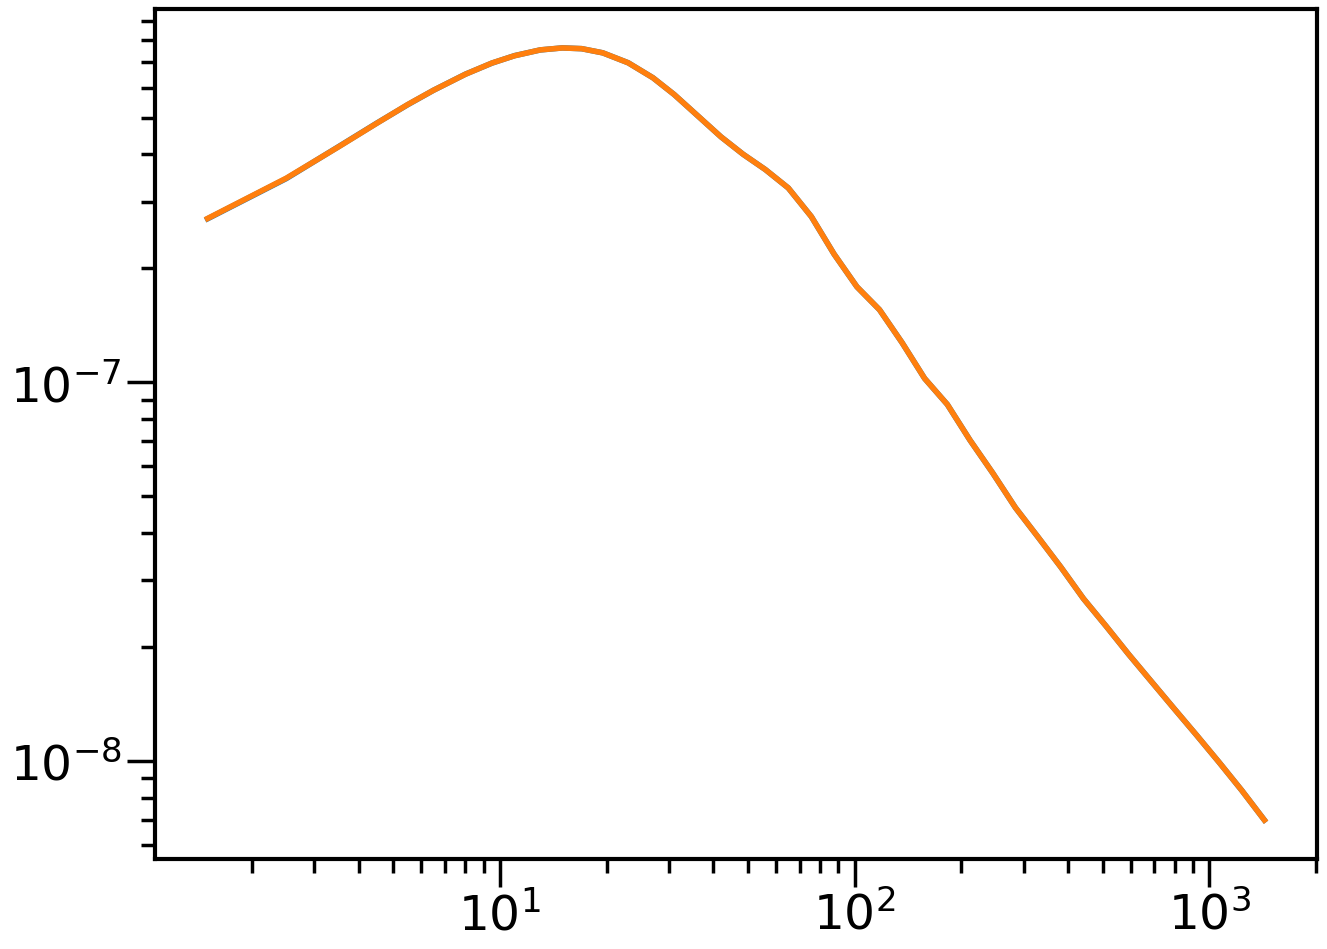

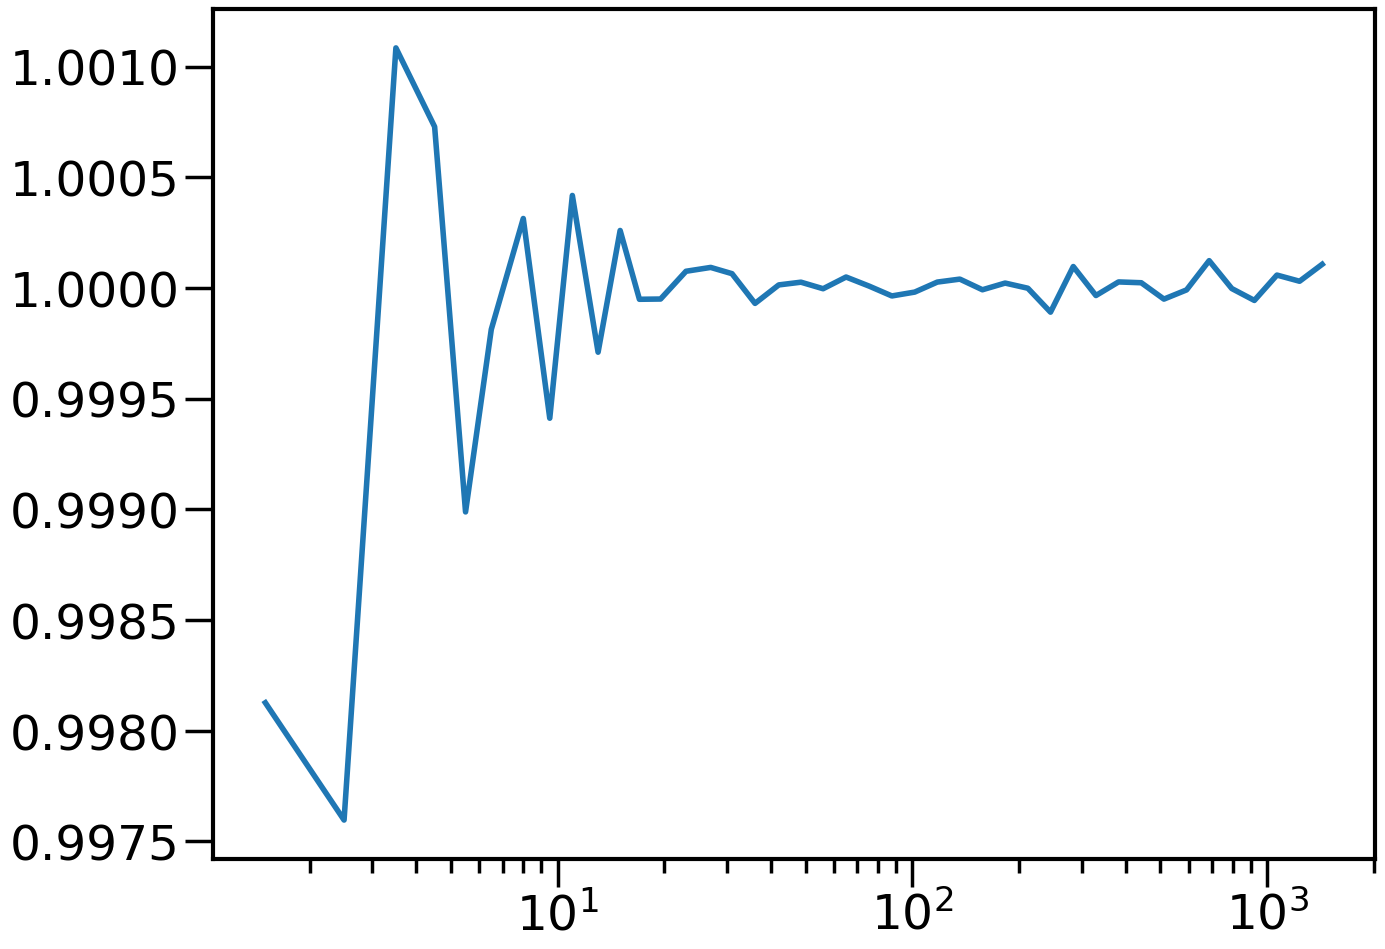

In [87]:
plot(lb,pcl0_b)
plot(lb,pcl_xiW_b)
loglog()
show()
plot(lb,pcl0_b/pcl_xiW_b)
xscale('log')


Text(0, 0.5, '$\\frac{D_\\ell}{\\xi\\rightarrow D_\\ell}$')

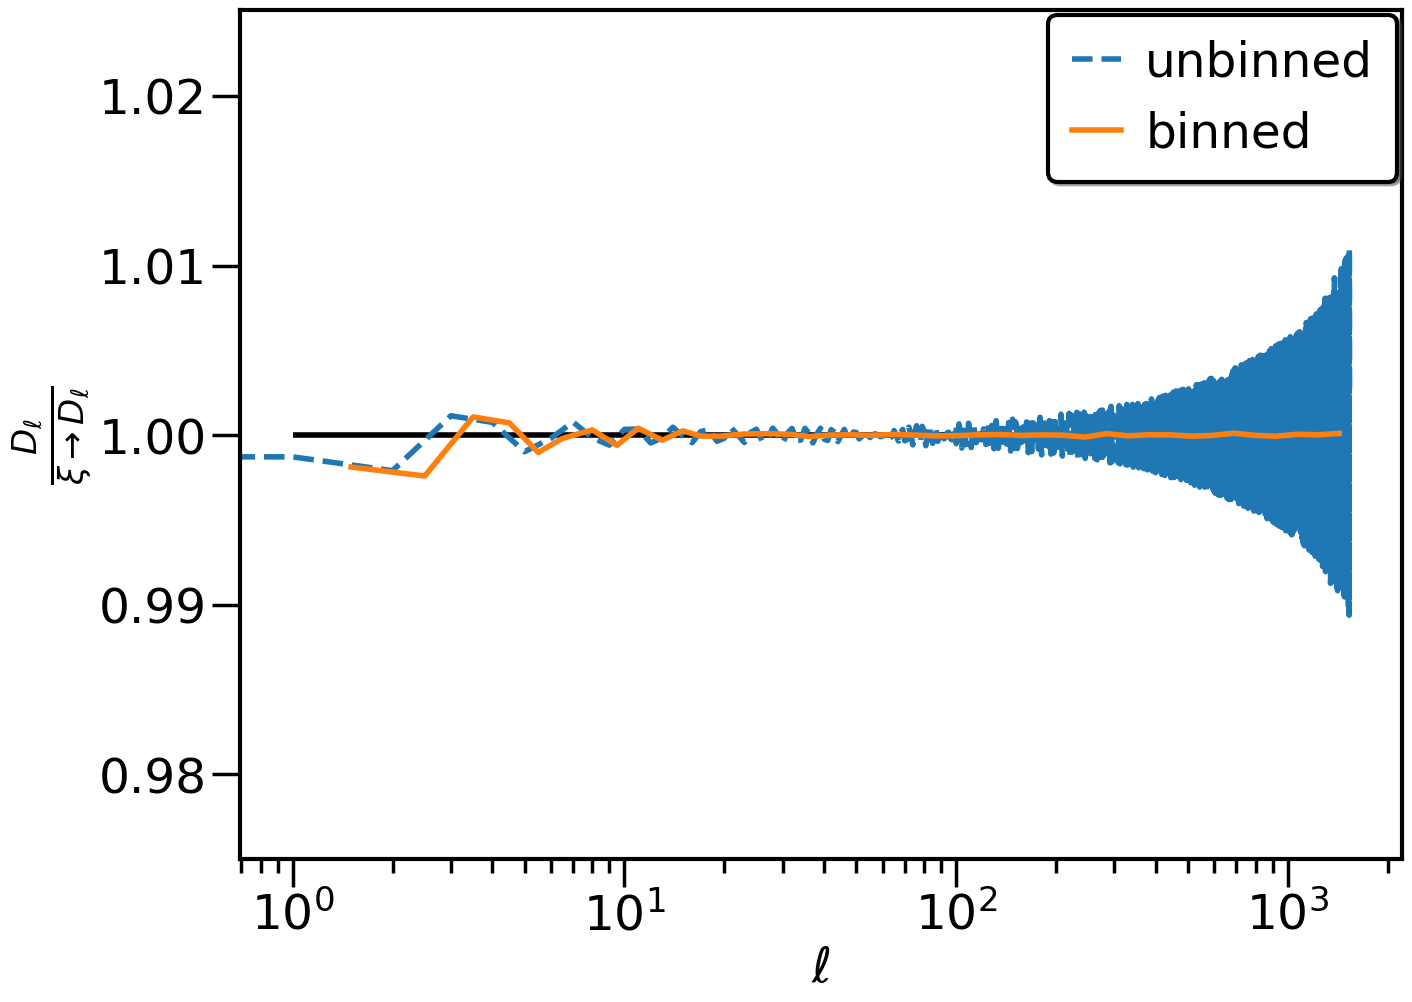

In [93]:
# plot(l,pcl0/(cl0ub*.3))
plot(linv,pcl0/pcl_xiW,'--',label='unbinned')
plot(lb,pcl0_b/pcl_xiW_b,label='binned')
xscale('log')
ylim(0.975,1.0251)
hlines(1,1,1000,color='k')
legend()
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell}{\xi\rightarrow D_\ell}$')

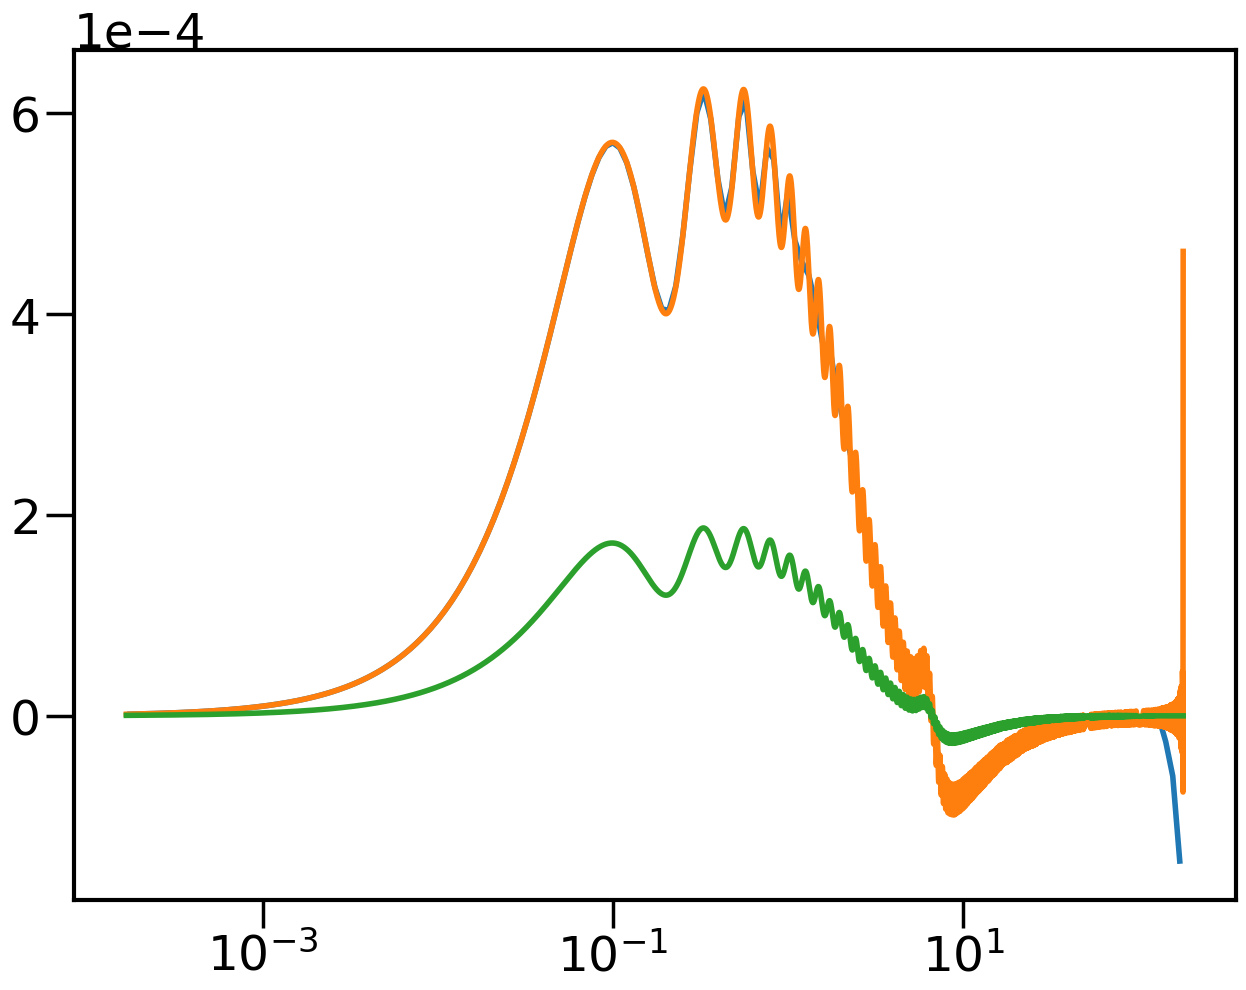

In [47]:
plot(thb,thb*xi0)
plot(th,th*xi0ub)
plot(th,th*xi0W_ub)
# loglog()
xscale('log')

In [51]:
SL_xi0.Win['cl'][corr][bi]['xi']

array([ 3.02539306e-01,  3.02539306e-01,  3.02539306e-01, ...,
       -8.39077018e-08, -1.16996430e-07,  7.77340137e-07])

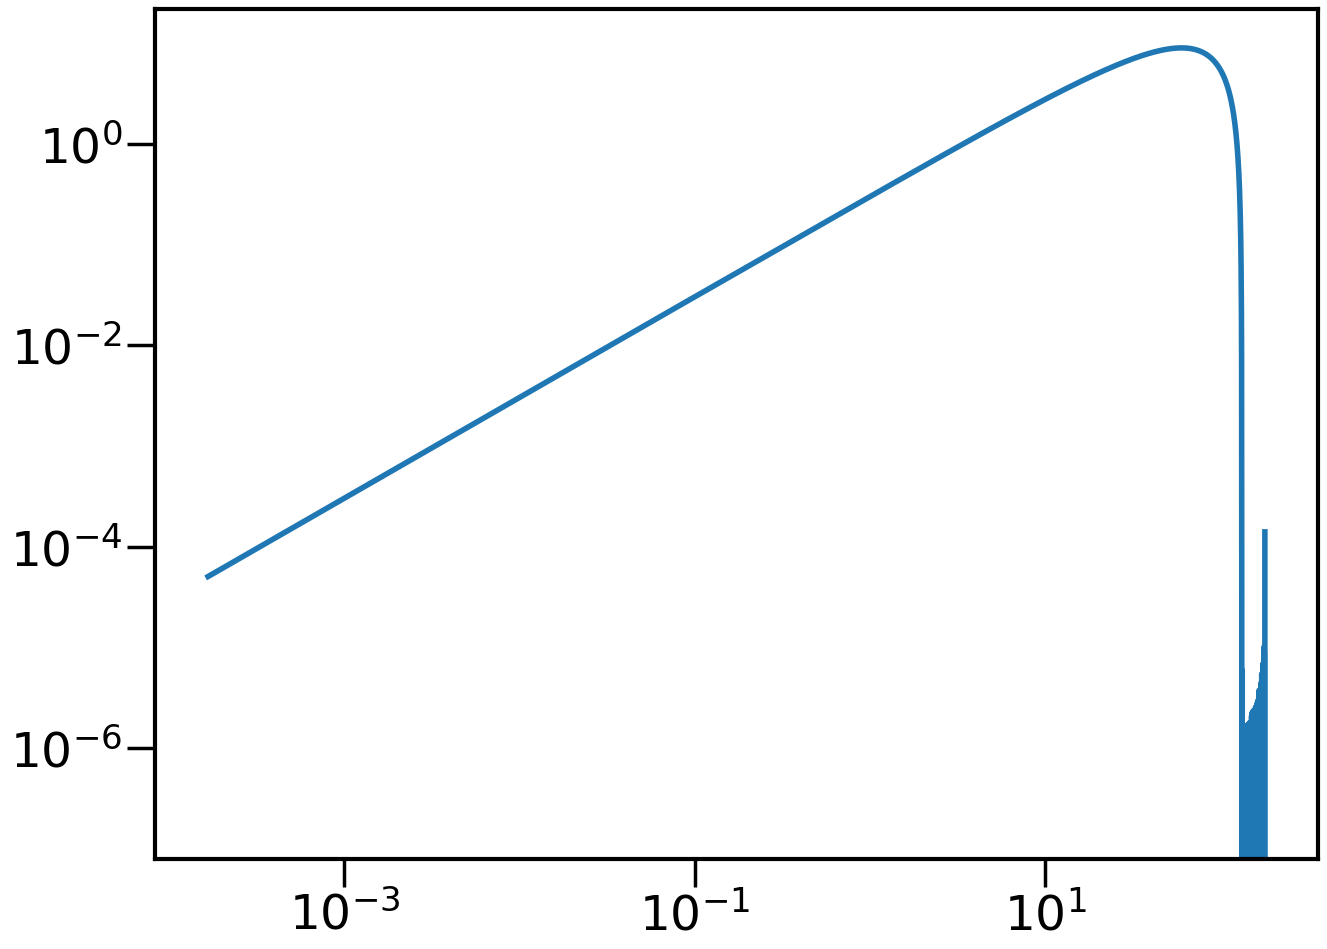

In [95]:
plot(th,th*SL_xi0.Win['cl'][corr][bi]['xi'])
xscale('log')
yscale('log')

In [22]:
l_bins_center=SL_xi0.binning.bin_1d(xi=cl0ub[corr][bi]*SL_xi0_ub.l,bin_utils=cl_bu)
l_bins_center/=SL_xi0.binning.bin_1d(xi=cl0ub[corr][bi],bin_utils=cl_bu)

theta_bins_center=SL_xi0.binning.bin_1d(xi=xi0ub[corr][s][bi]*WT.theta_deg[s],bin_utils=xi_bu[s])
theta_bins_center/=SL_xi0.binning.bin_1d(xi=xi0ub[corr][s][bi],bin_utils=xi_bu[s])